In [11]:
%matplotlib inline

2. Test with PSPNet Pre-trained Models
======================================

This is a quick demo of using GluonCV PSPNet model on ADE20K dataset.
Please follow the `installation guide <../index.html>`_ to install MXNet and GluonCV if not yet.


In [12]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

Prepare the image
-----------------

download the example image



In [13]:
'''
url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
    'segmentation/ade20k/ADE_val_00001142.jpg?raw=true'
filename = 'ade20k_example.jpg'
gluoncv.utils.download(url, filename, True)
'''
filename = 'data/2/train.jpg'

load the image



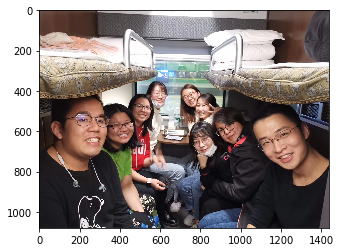

In [14]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

normalize the image using dataset mean



In [15]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

Load the pre-trained model and make prediction
----------------------------------------------

get pre-trained model



In [16]:
model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True)

self.crop_size 480


make prediction using single scale



In [17]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

Add color pallete for visualization



In [18]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('data/3/output-train.png')

show the predicted mask



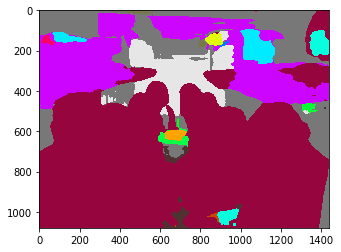

In [19]:
mmask = mpimg.imread('data/3/output-train.png')
plt.imshow(mmask)
plt.show()

# More Examples

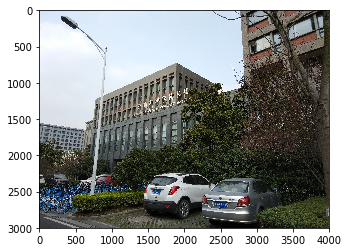

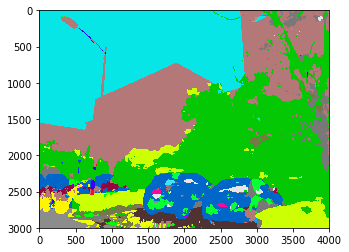

In [10]:
filename = 'data/2/nju-cs.jpg'

img = image.imread(filename)
plt.imshow(img.asnumpy())
plt.show()

img = test_transform(img, ctx)
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
mask = get_color_pallete(predict, 'ade20k')
mask.save('data/3/output-nju-cs.png')
mmask = mpimg.imread('data/3/output-nju-cs.png')
plt.imshow(mmask)
plt.show()

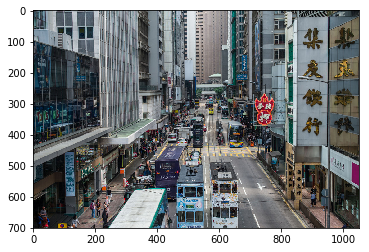

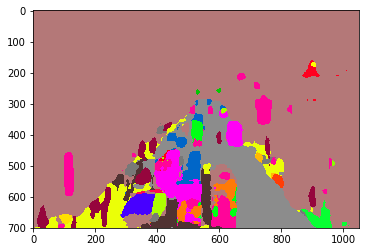

In [11]:
filename = 'data/2/2.jpg'

img = image.imread(filename)
plt.imshow(img.asnumpy())
plt.show()

img = test_transform(img, ctx)
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
mask = get_color_pallete(predict, 'ade20k')
mask.save('data/3/output2.png')
mmask = mpimg.imread('data/3/output2.png')
plt.imshow(mmask)
plt.show()

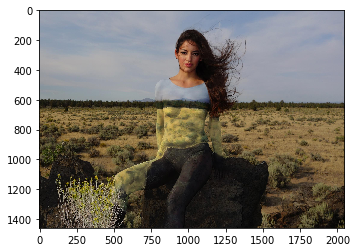

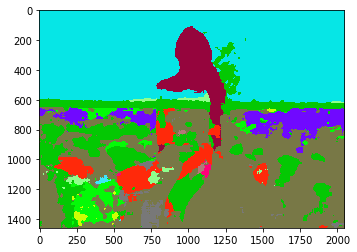

In [20]:
filename = 'data/2/1.jpg'

img = image.imread(filename)
plt.imshow(img.asnumpy())
plt.show()

img = test_transform(img, ctx)
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
mask = get_color_pallete(predict, 'ade20k')
mask.save('data/3/output1.png')
mmask = mpimg.imread('data/3/output1.png')
plt.imshow(mmask)
plt.show()